In [1]:
from bs4 import BeautifulSoup 
import requests
import spacy
from urllib.request import urlopen
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
!python3 -m spacy download pl_core_news_md

In [3]:
nlp = spacy.load("pl_core_news_md")

## 1. Utworzyć korpus wybranych dokumentów tekstowych (co najmniej 7 dokumentów), pochodzących z 3 różnych działów (np. ekonomia, sport, polityka, motoryzacja etc).

In [4]:
def getTextFromUrl(url):
  all_text = []
  source = requests.get(url).text
  soup = BeautifulSoup(source, 'lxml')
  article = soup.find('article')
  article_text = article.find_all(class_='article_p')

  if len(article_text) == 0:
    article_text = article.find_all(class_='Paragraph_desktopParagraph__c6y8w')
  
  for i in range(len(article_text)):
    all_text.append(article_text[i].text)

  all_text = str(" ".join(all_text))
  return all_text
  

In [ ]:
# Dział biznes (makroekonomia)
business1 = getTextFromUrl('https://businessinsider.com.pl/finanse/makroekonomia/puchna-oszczednosci-polakow-w-bankach-kredytow-ubywa-dla-konsumentow-to-nie-sa-dobre/d86j4ge')
print(business1)
business2 = getTextFromUrl('https://businessinsider.com.pl/finanse/makroekonomia/jastrzebi-pazur-bankow-centralnych-stopy-procentowe-jeszcze-beda-szly-w-gore-i-dlugo/089zb4q')
print(business2)
business3 = getTextFromUrl('https://businessinsider.com.pl/finanse/makroekonomia/ten-wskaznik-polskiej-inflacji-moze-niepokoic-wysokie-tempo-wzrostu-cen-moze-jeszcze/xw8cjw2')
print(business3)

# Dział sport (alpinizm)
alpinizm1 = getTextFromUrl('https://przegladsportowy.onet.pl/alpinizm/jedni-przeklinali-inni-sie-bali-tajemnica-gory-na-ktorej-zginal-jerzy-kukuczka/nnex1r0')
print(alpinizm1)
alpinizm2 = getTextFromUrl('https://przegladsportowy.onet.pl/alpinizm/baza-uslyszala-tylko-jedno-zdanie-oto-jak-zginal-kukuczka/6r7pmsj')
print(alpinizm2)
alpinizm3 = getTextFromUrl('https://przegladsportowy.onet.pl/alpinizm/widzial-z-bliska-smierc-jerzego-kukuczki-teraz-himalaista-opowie-o-swoim-zyciu-w/sphjh71')
print(alpinizm3)

#Dział e-sport (CS-GO)
esport1 = getTextFromUrl('https://przegladsportowy.onet.pl/esportmania/csgo/csgo-poznalismy-nowy-ranking-wiemy-ktore-polskie-zespoly-sa-najblizej-ms/68tckrd')
print(esport1)
esport2 = getTextFromUrl('https://przegladsportowy.onet.pl/esportmania/csgo/szereg-zmian-w-esl-pro-league-wiecej-druzyn-w-fazie-grupowej/n1gw2mk')
print(esport2)
esport3 = getTextFromUrl('https://przegladsportowy.onet.pl/esportmania/csgo/symboliczny-gest-rosyjskich-zawodnikow-sprzeciwiaja-sie-wojnie-w-ukrainie/cd8fmft')
print(esport3)

In [6]:
def tokenizer(document):
    return [word.text.lower() for word in nlp(document) if word.text not in 
            '\n\r\t!"-—#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~1234567890' and word.text.isalpha()]

In [7]:
def lemmatizer(document):
    return [word.lemma_ for word in nlp(" ".join(document))]
    

In [8]:
def removeStopwords(document):
    stopwords = tokenizer(urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode("utf8"))

    for word in document:
        if word in stopwords:
            document.remove(word)
    return document

In [9]:
business1_tokens = lemmatizer(removeStopwords(tokenizer(business1)))
#print(business1_tokens)
business2_tokens = lemmatizer(removeStopwords(tokenizer(business2)))
#print(business2_tokens)
business3_tokens = lemmatizer(removeStopwords(tokenizer(business3)))
#print(business3_tokens)

alpinizm1_tokens = lemmatizer(removeStopwords(tokenizer(alpinizm1)))
#print(alpinizm1_tokens)
alpinizm2_tokens = lemmatizer(removeStopwords(tokenizer(alpinizm2)))
#print(alpinizm2_tokens)
alpinizm3_tokens = lemmatizer(removeStopwords(tokenizer(alpinizm3)))
#print(alpinizm3_tokens)

esport1_tokens = lemmatizer(removeStopwords(tokenizer(esport1)))
#print(esport1_tokens)
esport2_tokens = lemmatizer(removeStopwords(tokenizer(esport2)))
#print(esport2_tokens)
esport3_tokens = lemmatizer(removeStopwords(tokenizer(esport3)))
#print(esport3_tokens)


In [10]:
corpus = []
corpus.append(" ".join(business1_tokens))
corpus.append(" ".join(business2_tokens))
corpus.append(" ".join(business3_tokens))
corpus.append(" ".join(alpinizm1_tokens))
corpus.append(" ".join(alpinizm2_tokens))
corpus.append(" ".join(alpinizm3_tokens))
corpus.append(" ".join(esport1_tokens))
corpus.append(" ".join(esport2_tokens))
corpus.append(" ".join(esport3_tokens))


## Pozostawić wyłącznie tokeny składające się z samych liter (co implikuje usunięcie znaków interpunkcyjnych), a następnie zbudować macierz DTM (Document Term Matrix) wykorzystując formy podstawowe słów.

In [11]:
vectorizer = CountVectorizer()
A = vectorizer.fit_transform(corpus)
df= pd.DataFrame(A.toarray() , columns=vectorizer.get_feature_names())
df_with_index = df
df_with_index.index = ['binzes1','binzes2','binzes3','alpinizm1','alpinizm2','alpinizm3','esport1','esport2','esport3']
df_with_index

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aby,administrowany,afera,ago,aha,akcenta,akceptować,akcja,aktualizacja,aktualizowany,...,światło,świetnie,świetny,żaden,żałoba,że,żona,życie,żywność,żyła
binzes1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
binzes2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
binzes3,0,1,0,0,0,0,2,0,1,0,...,0,0,0,0,0,4,0,0,5,0
alpinizm1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,3,0,0,0,0
alpinizm2,0,0,0,0,1,0,0,0,0,0,...,1,1,2,1,0,4,0,0,0,0
alpinizm3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
esport1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
esport2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
esport3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


Na podstawie macierzy DTM tworzę macierz obrazującą zsumowane wyniki dla każdego z tematów

In [12]:
sum_biznes = df.iloc[0:3].sum()
#sum_biznes.name = 'biznes'
sum_alpinizm = df.iloc[3:6].sum()
#sum_alpinizm.name = 'alpinizm'
sum_esport = df.iloc[6:9].sum()
#sum_esport.name = 'esport'

df_biznes = pd.DataFrame(sum_biznes)
df_biznes = df_biznes.transpose()

df_alpinizm = pd.DataFrame(sum_alpinizm)
df_alpinizm = df_alpinizm.transpose()

df_esport = pd.DataFrame(sum_esport)
df_esport = df_esport.transpose()

df_topics = df_biznes.append(df_alpinizm) # biznes + alpinizm
df_topics = df_topics.append(df_esport) # + esport

df_topics
df_topics_with_index = df_topics
df_topics_with_index.index = ['biznes','alpinizm','esport']
df_topics_with_index


,aby,administrowany,afera,ago,aha,akcenta,akceptować,akcja,aktualizacja,aktualizowany,...,światło,świetnie,świetny,żaden,żałoba,że,żona,życie,żywność,żyła
biznes,1,1,0,0,0,0,2,2,1,0,...,0,0,0,0,0,8,0,0,5,0
alpinizm,0,0,0,0,1,0,0,1,0,0,...,1,1,3,1,1,7,0,1,0,1
esport,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


Inny, prosty przykład (na prostszych przykładach łatwiej jest zrozumieć):

In [13]:
doc1_tst = "Człowiek ma kota. Kot lubi człowieka."
doc2_tst = "Pies lubi przynosić patyk. Patyki są przynoszone przez psa"
doc3_tst = "Człowiek ma psa oraz kota. Kot i pies lubią przynosić patyki"

In [14]:
doc1_tst = lemmatizer(removeStopwords(tokenizer(doc1_tst)))
doc2_tst = lemmatizer(removeStopwords(tokenizer(doc2_tst)))
doc3_tst = lemmatizer(removeStopwords(tokenizer(doc3_tst)))

In [15]:
corpus_tst = []
corpus_tst.append(" ".join(doc1_tst))
corpus_tst.append(" ".join(doc2_tst))
corpus_tst.append(" ".join(doc3_tst))

In [16]:
vectorizer_tst = CountVectorizer()
A_tst = vectorizer_tst.fit_transform(corpus_tst)
df_tst = pd.DataFrame(A_tst.toarray() , columns=vectorizer_tst.get_feature_names())
df_tst

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,człowiek,kot,lubić,patyk,pies,przynosić
0,2,2,1,0,0,0
1,0,0,1,2,2,2
2,1,2,1,1,2,1


Kontynuacja zadania

## Wyznaczyć macierze U, S, V.

Wyznaczanie macierzy SVD : https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html , https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

Przy okazji dokonuję również normalizacji

Np. scipy.linalg.svd nie zwraca macierzy S, a jedynie listę wartości osobliwych (pierwiastek kwadratowy wartości własnych macierzy). Dodatkowo pozostałe macierze są pełne, tzn. nie ograniczają się do ustalonej k liczby tematów, a ich rozmiary determinowane są przez liczby dokumentów i tokenów. Tak zwrócone obiekty są jak najbardziej prawidłowo wyznaczone i do wykorzystania w dalszej części rozwiązania, ale trzeba mieć świadomość co sobą reprezentują i jak z nich skorzystać. 

Kolejnym przykładem nieprawidłowego wykorzystania zwracanych wartości (być może z powodu niedoczytania dokumentacji lub niezrozumienia istoty faktoryzacji według wartości osobliwych) jest wykorzystanie sklearn.decomposition.TruncatedSVD i funkcji fit_transform. Funkcja zwraca iloczyn U * S[igma], co nie jest samą macierzą U, którą zgodnie z treścią zadania należało wykorzystać do graficznej reprezentacji rozkładu wyznaczonych tematów pośród dokumentów korpusu. Należy ze wspomnianego iloczynu wyznaczyć samą macierz U i dopiero wtedy zrealizować odpowiednie punkty zadania (co miało też miejsce w niektórych z przekazanych rozwiązań).

pierwsze zdjęcie - macierz D

drugie zjęcie - macierz U

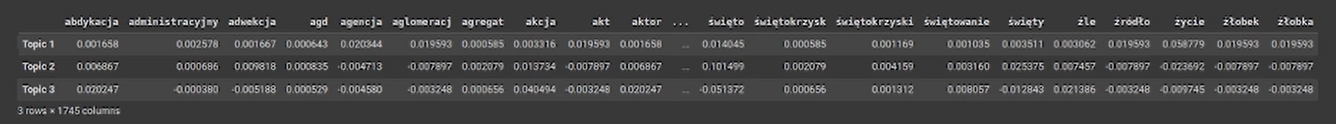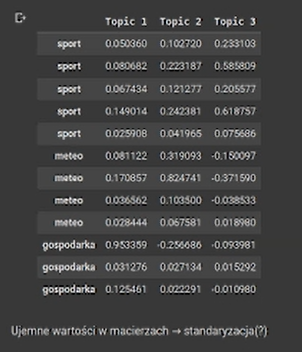

Poniżej poprawne wyznaczanie macierzy SVD

In [17]:
from sklearn.utils.extmath import randomized_svd

In [18]:
u, s, vt = randomized_svd(A.toarray(), n_components = 3)  # reduce to 2 features

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [19]:
topics = ['biznes','alpinizm','esport']
indexes = ['binzes1','binzes2','binzes3','alpinizm1','alpinizm2','alpinizm3','esport1','esport2','esport3']

In [20]:
print('U matrix:\n')
pd.DataFrame(u, columns = topics, index= indexes)

U matrix:



,biznes,alpinizm,esport
binzes1,0.349677,-0.021047,0.514890
binzes2,0.792261,-0.366818,-0.481841
binzes3,0.345866,-0.100410,0.691402
alpinizm1,0.199698,0.492418,-0.148587
alpinizm2,0.292083,0.772591,-0.034608
alpinizm3,0.048387,0.096766,0.008216
esport1,0.020026,0.045764,0.012240
esport2,0.040904,0.042779,0.030563
esport3,0.028601,0.047523,0.015886


In [21]:
print('\nS matrix:\n')
pd.DataFrame(s)


S matrix:



,0
0,99.644295
1,69.620797
2,42.821481


In [22]:
print('\nV matrix:\n')
VT = pd.DataFrame(vt, columns=vectorizer.get_feature_names(), index= topics)
VT


V matrix:



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aby,administrowany,afera,ago,aha,akcenta,akceptować,akcja,aktualizacja,aktualizowany,...,światło,świetnie,świetny,żaden,żałoba,że,żona,życie,żywność,żyła
biznes,0.007951,0.003471,0.000287,0.000201,0.002931,0.000201,0.006942,0.007504,0.003471,0.000201,...,0.002931,0.002931,0.007867,0.002931,0.002004,0.059270,0.000287,0.000486,0.017355,0.000486
alpinizm,-0.005269,-0.001442,0.000683,0.000657,0.011097,0.000657,-0.002884,0.000785,-0.001442,0.000657,...,0.011097,0.011097,0.029267,0.011097,0.007073,0.044412,0.000683,0.001390,-0.007211,0.001390
esport,-0.011252,0.016146,0.000371,0.000286,-0.000808,0.000286,0.032292,0.024240,0.016146,0.000286,...,-0.000808,-0.000808,-0.005086,-0.000808,-0.003470,0.029580,0.000371,0.000192,0.080731,0.000192


## Przedstawić w postaci chmury tagów słowa należące do każdego tematu (wielkość słowa powinna odpowiadać sile związku słowa z tematem)

In [23]:
def plotCloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

 Wizualizacja chmury tagów dla tematu: biznes


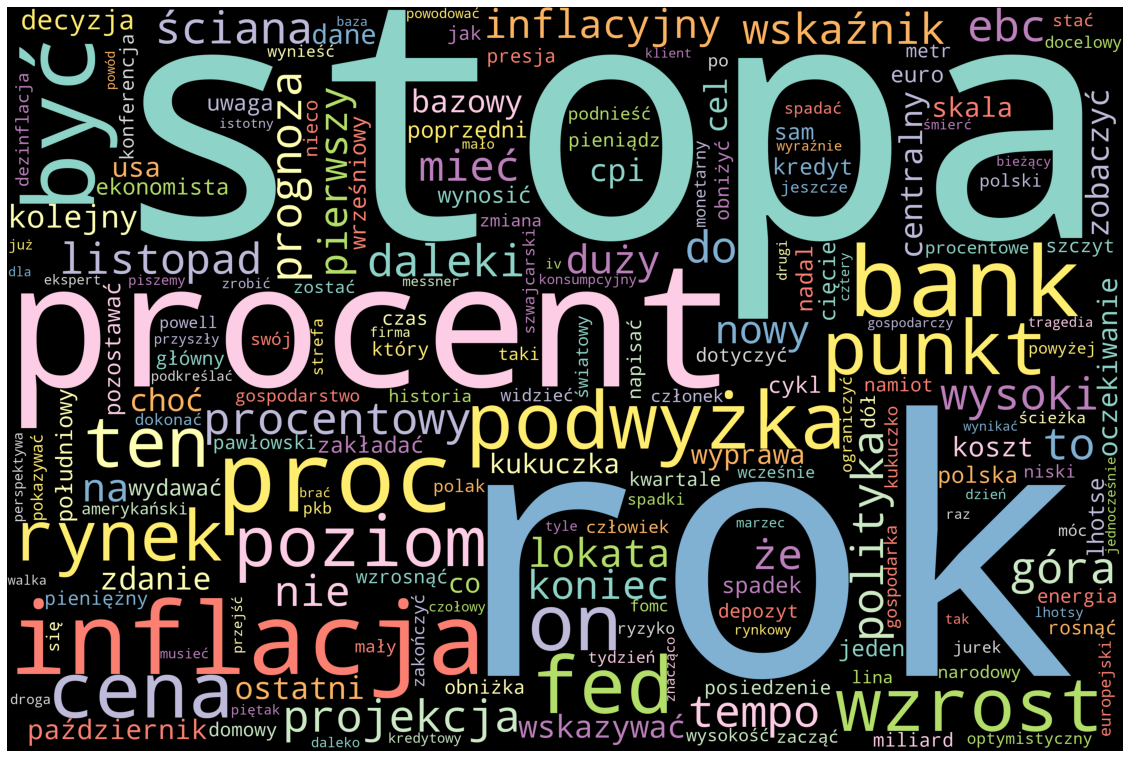

In [24]:
print(" Wizualizacja chmury tagów dla tematu: biznes")

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate_from_frequencies((VT.T['biznes']+1)/2)

plotCloud(wordcloud)

 Wizualizacja chmury tagów dla tematu: alpinizm


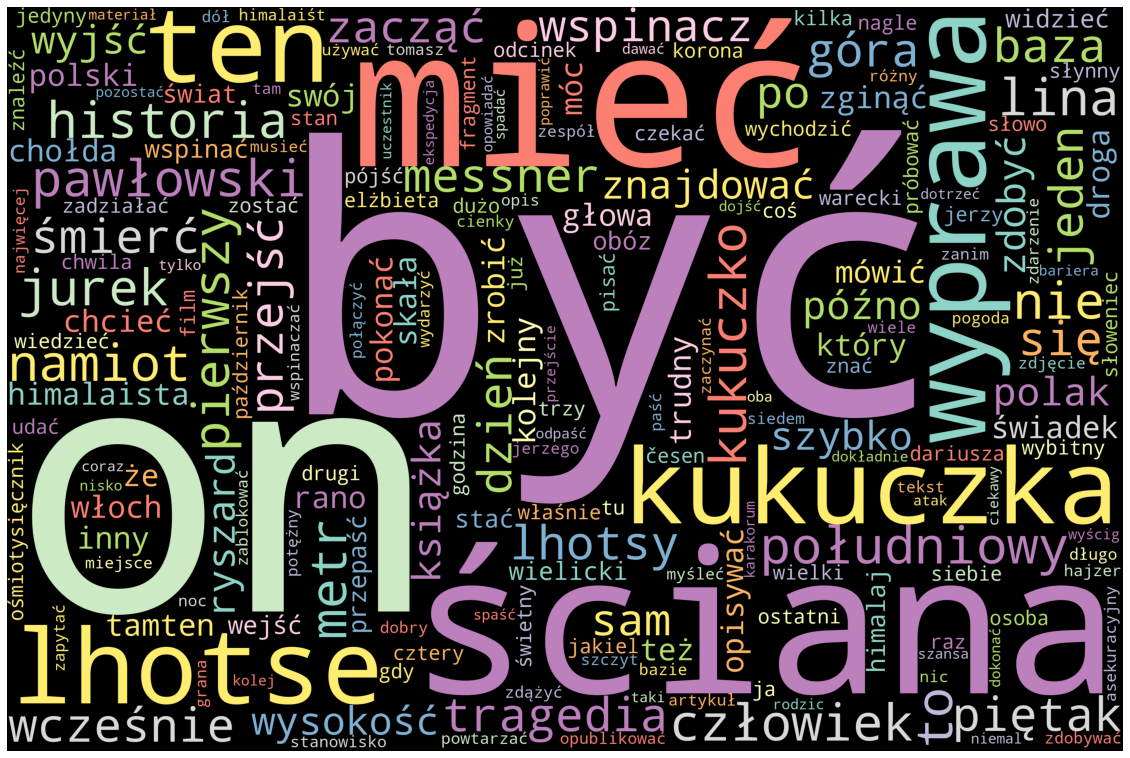

In [25]:
print(" Wizualizacja chmury tagów dla tematu: alpinizm")

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate_from_frequencies((VT.T['alpinizm']+1)/2)
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla tematu: esport


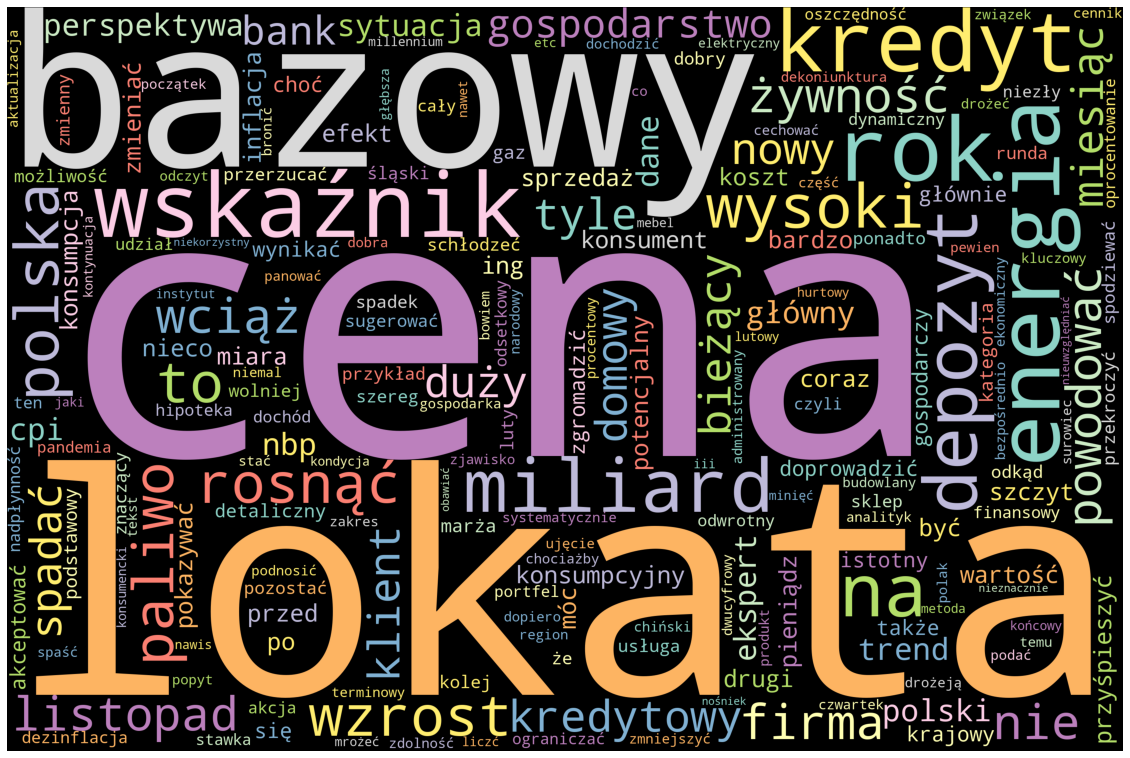

In [26]:
print(" Wizualizacja chmury tagów dla tematu: esport")

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate_from_frequencies((VT.T['esport']+1)/2)
plotCloud(wordcloud)

In [27]:
categories = ['Biznes','Alpinizm','Esport']


fig = go.Figure()


fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[0,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='biznes1'
))
fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[1,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='biznes2'
))
fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[2,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='biznes3'
))
fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[3,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='alpinizm1'
))

fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[4,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='alpinizm2'
))
fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[5,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='alpinizm3'
))

fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[6,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='esport1'
))
fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[7,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='esport2'
))
fig.add_trace(go.Scatterpolar(
    
      r=[abs(element) for element in list((pd.DataFrame(u).loc[8,:]+1)/2)],

      theta=categories,

      fill='toself',

      name='esport3'
))


fig.update_layout(
    
  polar=dict(
      
    radialaxis=dict(
        
      visible=True

    )),

  showlegend=True
)


fig.show()